# Capstone Project - Exploring and Clustering Restaurants in Pune, India
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will explore and group the **restaurants** in the city of **Pune** in few categories based on the **Ratings** and **Price range** of the Restaurants.
Pune is home to an eclectic crowd of food-lovers and the city serves up everything from Western favourites to Asian delicacies. Whether you’re looking for a haven of fusion foods or a traditional taste of lip-smacking snacks—there’s no dearth of restaurants to satisfy the discerning palate.Pune, being a metropolis and centre of prominent education institutes, is a melting pot of cultures which is reflected in its food too. 
The food-lovers are always in search of Restaurants with Good Ratings and also Restaurants that suits there Pocket.This project will help these people to shortlist and plan their visit to the restaurants accordingly.
This project will also help businesses who are looking to invest in eateries in the Pune city.

With the help of machine learning and Data science we will try to achieve the objective of this project.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* The location of the Restaurants in Pune
* The categories of these restaurants
* The Ratings of these restaurants 
* The Price range of these restaurants

The data source that we will use to fetch the location information,the categories,ratings and price range of restaurants will be **the FourSquare API**

Importing the required packages

In [2]:
#Importing packages
import numpy as np
import pandas as pd
%pip install geopy 
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

     |████████████████████████████████| 112kB 8.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


**Pune** is a city with a large area of 331 sq.km.
We will use the geopy library to extract the Latitude and Longitude coordinates of Pune City

In [3]:
address = 'Pune'

geolocator = Nominatim(user_agent="pune_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Pune City are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Pune City are 18.521428, 73.8544541.


Now using these co-ordinates and using the Folium library we will plot the Map of Pune
It will help us know the centre and surrounding area of it

In [4]:
pune_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.Marker([latitude, longitude]).add_to(pune_map)
pune_map.save("Pune Map.html")
pune_map

### Foursquare API
Now that we have our location candidates, let's use Foursquare API to get info on restaurants
First we will have to define the parameters of the API, we will keep the Radius 20 Km and limit the number of venues to 200

In [5]:
CLIENT_ID = 'KT5LJ0DVAD21MUTCJAFC1OIV2CMXIOEY0B1S1EWYSF3CSA3P' #  Foursquare ID
CLIENT_SECRET = 'PHNFH1J5S2VWPS551WUQFJEVSYQ11DBH33LYT0TGQBA0OXJC' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version
RADIUS = 20000  
LIMIT = 200

We will use the /explore API of Foursquare and filter all venues to get only the food-related venues

In [6]:
food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues
url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(food_category,CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,  RADIUS, LIMIT)
results = requests.get(url).json()
venues_fetched = len(results['response']['groups'][0]['items'])
venues_fetched

100

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id,venue.location.neighborhood
0,e-0-4feebcafe4b0da11fdbe582b-0,0,"[{'summary': 'This spot is popular', 'type': '...",4feebcafe4b0da11fdbe582b,Mad Over Donuts,"Near Sambhaji Park, JM Road",18.519335,73.845320,"[{'label': 'display', 'lat': 18.51933511140425...",991,...,Pune,Mahārāshtra,India,"[Near Sambhaji Park, JM Road, Pune 411004, Mah...","[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",0,[],NaN,NaN,NaN
1,e-0-509e80b6e4b04eb23d1ec2e2-1,0,"[{'summary': 'This spot is popular', 'type': '...",509e80b6e4b04eb23d1ec2e2,Le Plaisir,"Shop No. 4B, Lane 6 Intersection, Off Bhandark...",18.514205,73.838551,"[{'label': 'display', 'lat': 18.51420497479481...",1861,...,Pune,Mahārāshtra,India,"[Shop No. 4B, Lane 6 Intersection, Off Bhandar...","[{'id': '52e81612bcbc57f1066b79f1', 'name': 'B...",0,[],"Opp. Kelkar Eye Hospital, Prabhat Road",52549645,NaN
2,e-0-4b9b583cf964a520aa0136e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b9b583cf964a520aa0136e3,Café GoodLuck,"759/75, GoodLuck Chowk",18.517388,73.841485,"[{'label': 'display', 'lat': 18.5173883002662,...",1440,...,Pune,Mahārāshtra,India,"[759/75, GoodLuck Chowk (Corner of FC Road and...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Corner of FC Road and Bhandarkar Road,NaN,NaN
3,e-0-4de24c587d8b2547eaffe58b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4de24c587d8b2547eaffe58b,Tilak Hotel,Sadashiv Peth,18.509603,73.846883,"[{'label': 'display', 'lat': 18.50960261815985...",1540,...,Pune,Mahārāshtra,India,"[Sadashiv Peth (Tilak road), Pune 411030, Mahā...","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],Tilak road,NaN,NaN
4,e-0-4f016c4629c201c6fec99a78-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f016c4629c201c6fec99a78,Barbeque Nation,3rd Floor R Deccan Mall,18.516237,73.842223,"[{'label': 'display', 'lat': 18.51623735504808...",1414,...,Pune,Mahārāshtra,India,[3rd Floor R Deccan Mall (Jangali Maharaj Road...,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",0,[],Jangali Maharaj Road,NaN,NaN


We define the get_category_type method to get the correct category for each restaurant.

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.crossStreet']
dataframe_filtered = dataframe.loc[:, filtered_columns]    
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.dropna(inplace = True) #DATA Cleaning: By removing the rows with 'NaN' column values
dataframe_filtered = dataframe_filtered.reset_index(drop = True)
dataframe_filtered

,id,name,categories,lat,lng,crossStreet
0,509e80b6e4b04eb23d1ec2e2,Le Plaisir,Bistro,18.514205,73.838551,"Opp. Kelkar Eye Hospital, Prabhat Road"
1,4b9b583cf964a520aa0136e3,Café GoodLuck,Café,18.517388,73.841485,Corner of FC Road and Bhandarkar Road
2,4de24c587d8b2547eaffe58b,Tilak Hotel,Snack Place,18.509603,73.846883,Tilak road
3,4f016c4629c201c6fec99a78,Barbeque Nation,BBQ Joint,18.516237,73.842223,Jangali Maharaj Road
4,4de0a8e918380dc4dd35585c,Spice Kitchen,Asian Restaurant,18.531887,73.829571,Senapati Bapat Road
...,...,...,...,...,...,...
63,4b93c4e3f964a520bc5034e3,Taareef,Indian Restaurant,18.556077,73.809120,I.t.I. Road
64,4c88f62594f5a09317dcd31e,Terrace Restaurant,Restaurant,18.477544,73.889783,NIBM
65,5999469309e2837b2f738659,Tea Villa Cafe,Café,18.562925,73.918076,Vimannagar
66,4d0a55daacd4a1cdfc6f8193,Richie Rich,Café,18.457362,73.852508,Katraj


Now from this /explore API we have got the Information regarding name,category and location
But still we don't have the **Rating** and **Price range** information, we will obtain this information as well using the **Foursquare** API

In [10]:
ratePriceTable = []
for index, row in dataframe_filtered.iterrows():
    ratingAndPrice = []
    venue_id = dataframe_filtered.iloc[index,0]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    ratingAndPrice.append(venue_id)
    ratingAndPrice.append(result['response']['venue']['rating'])
    try:
        ratingAndPrice.append(result['response']['venue']['price']['tier'])
        ratingAndPrice.append(result['response']['venue']['price']['message'])
    except: 
        ratingAndPrice.append('NaN')
        ratingAndPrice.append('NaN')
    ratePriceTable.append(ratingAndPrice)

ratingPriceDf = pd.DataFrame(ratePriceTable, 
                                  columns = ['id','Rating', 'Price_Tier', 
                                             'Price_Range'])
ratingPriceDf = ratingPriceDf[ratingPriceDf['Price_Tier'] != "NaN"]
ratingPriceDf = ratingPriceDf[ratingPriceDf['Price_Range'] != "NaN"]
ratingPriceDf.reset_index(drop = True)
ratingPriceDf

,id,Rating,Price_Tier,Price_Range
1,4b9b583cf964a520aa0136e3,8.5,1,Cheap
2,4de24c587d8b2547eaffe58b,8.4,1,Cheap
3,4f016c4629c201c6fec99a78,8.3,2,Moderate
4,4de0a8e918380dc4dd35585c,8.6,2,Moderate
5,4b5ffe7df964a520c9d229e3,8.2,2,Moderate
...,...,...,...,...
63,4b93c4e3f964a520bc5034e3,7.5,2,Moderate
64,4c88f62594f5a09317dcd31e,7.5,2,Moderate
65,5999469309e2837b2f738659,7.7,1,Cheap
66,4d0a55daacd4a1cdfc6f8193,7.6,1,Cheap


Now we will merge these two Dataframes 

In [11]:
mergedDf = pd.merge(ratingPriceDf,dataframe_filtered,how='right',on='id')
mergedDf.dropna(inplace = True)
mergedDf.reset_index(drop = True)

,id,Rating,Price_Tier,Price_Range,name,categories,lat,lng,crossStreet
0,4b9b583cf964a520aa0136e3,8.5,1,Cheap,Café GoodLuck,Café,18.517388,73.841485,Corner of FC Road and Bhandarkar Road
1,4de24c587d8b2547eaffe58b,8.4,1,Cheap,Tilak Hotel,Snack Place,18.509603,73.846883,Tilak road
2,4f016c4629c201c6fec99a78,8.3,2,Moderate,Barbeque Nation,BBQ Joint,18.516237,73.842223,Jangali Maharaj Road
3,4de0a8e918380dc4dd35585c,8.6,2,Moderate,Spice Kitchen,Asian Restaurant,18.531887,73.829571,Senapati Bapat Road
4,4b5ffe7df964a520c9d229e3,8.2,2,Moderate,Hotel Roopali,Indian Restaurant,18.519343,73.841334,Sudhabhau Kelkar Road
...,...,...,...,...,...,...,...,...,...
59,4b93c4e3f964a520bc5034e3,7.5,2,Moderate,Taareef,Indian Restaurant,18.556077,73.809120,I.t.I. Road
60,4c88f62594f5a09317dcd31e,7.5,2,Moderate,Terrace Restaurant,Restaurant,18.477544,73.889783,NIBM
61,5999469309e2837b2f738659,7.7,1,Cheap,Tea Villa Cafe,Café,18.562925,73.918076,Vimannagar
62,4d0a55daacd4a1cdfc6f8193,7.6,1,Cheap,Richie Rich,Café,18.457362,73.852508,Katraj


Looking good. So now after Data cleaning and processing we have the **64** restaurants in area with the required information

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report 

In [12]:
mergedDf.to_csv('dataFrame.csv')

## Methodology <a name="methodology"></a>

In this project our objective is to explore and group the restaurants in the city of Pune in few categories based on the Ratings and Price range of the Restaurants.

In first step we have collected the required **data: location, type (category), rating, price range of every restaurant within 20km from Pune center** by using only the Foursquare API

In the Second step, we'll **analyse** the data that we created based on the ratings and price of each restaurants. We'll analyze the restaurants based on their **Category distribution** and also analyze restaurants based on their **Price range**

Lastly in the third and final step, we'll **cluster the restaurants based on the available information of each**. This will allow us to clearly identify which restaurants can be recommended and with what features.

## Analysis <a name="analysis"></a>

We will perform some basic explanatory data analysis and derive some additional info from our raw data.

Let's have look at the selected restaurants on the Pune city map

In [13]:
#Restaurants on map
latitude = location.latitude
longitude = location.longitude
pune_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, latitude, longitude in zip(mergedDf['name'], mergedDf['lat'], mergedDf['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(pune_map)  

pune_map.save("Restaurant map.html")
pune_map

There are restaurants of various categories in Pune. Let's plot it and check which is the **most popular category**

<BarContainer object of 21 artists>

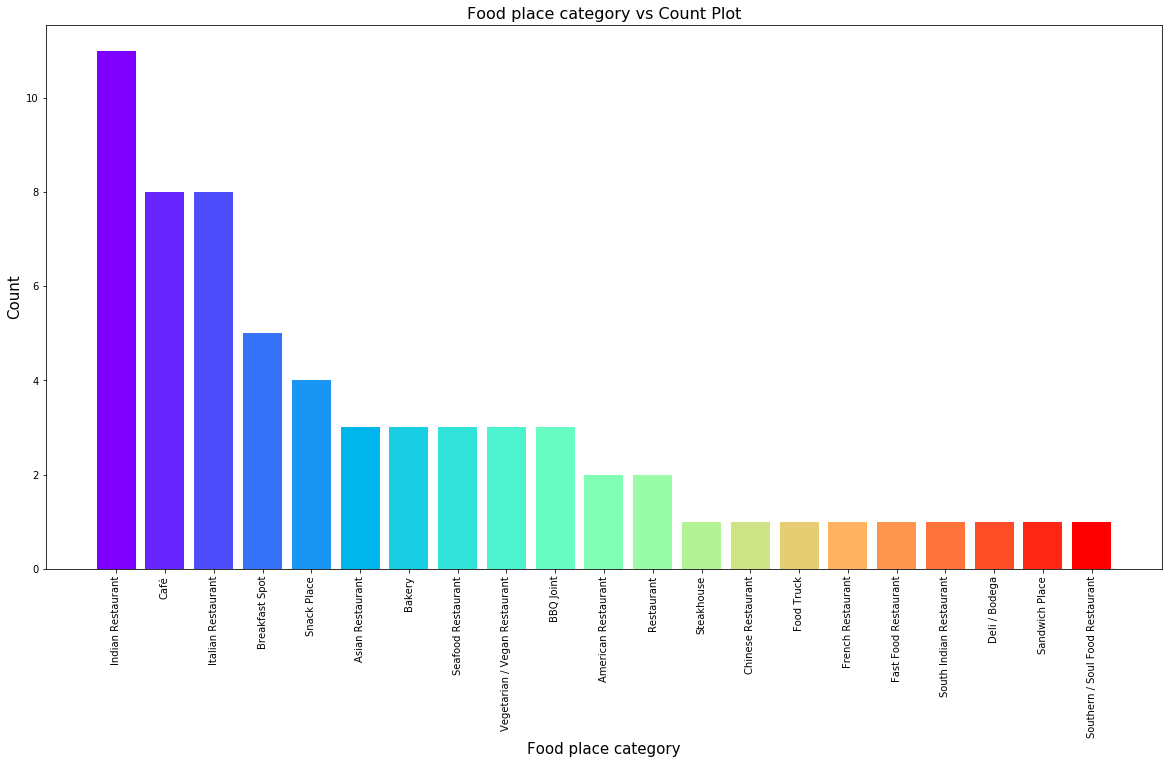

In [14]:
foodPlace_distribution = mergedDf['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(foodPlace_distribution.index)))
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.xlabel("Food place category", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Food place category vs Count Plot", fontsize = 16)
plt.bar(foodPlace_distribution.index, foodPlace_distribution.values, color = colors)

From this plot we can understand that the 3 most popular categories of Eateries in Pune are **Indian Restaurants**, **Cafe** and **Italian Restaurants**

Now we will plot the Price Category vs Count plot to get idea of Price category of majority of restaurants.

<BarContainer object of 4 artists>

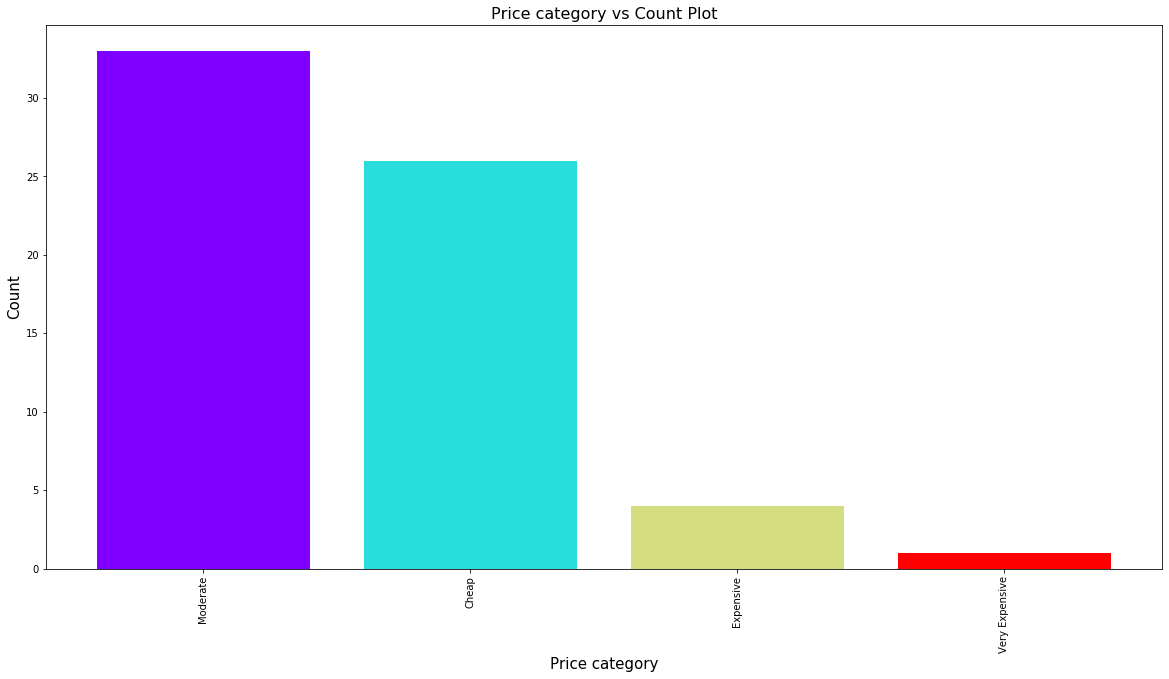

In [15]:
price_distribution = mergedDf['Price_Range'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(price_distribution.index)))
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 90)
plt.xlabel("Price category", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Price category vs Count Plot", fontsize = 16)
plt.bar(price_distribution.index, price_distribution.values, color = colors)

From this plot we can understand that the **majority** restaurants in Pune are **Moderately priced** or **Cheaply priced**.
There are very few Expensive/Very Expensive restaurants in Pune

**Data Preprocessing**

Now we will **prepare the data** so that we can apply it to the **Clustering model**

First we will convert the type of the required column value to **Integer/Float**

In [16]:
mergedDf = mergedDf.astype({"Price_Tier": float})
mergedDf.dtypes

id              object
Rating         float64
Price_Tier     float64
Price_Range     object
name            object
categories      object
lat            float64
lng            float64
crossStreet     object
dtype: object

We will only require the **Rating and Price_Tier** column for clustering.

So we will remove the other columns

In [17]:
dfForClustering = mergedDf.drop(['id','Price_Range','name','categories','lat','lng','crossStreet'], axis=1)
dfForClustering.head()

,Rating,Price_Tier
0,8.5,1.0
1,8.4,1.0
2,8.3,2.0
3,8.6,2.0
4,8.2,2.0


Now let's normalize the dataset.  Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [18]:
from sklearn.preprocessing import StandardScaler

X = dfForClustering.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

### Modeling

Let's run our model and group the restaurants into 3 clusters

In [19]:
from sklearn.cluster import KMeans 
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=16, random_state = 0)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 0 1 1 1 0 1 0 1 1 0 0 2 1 0 1 1 1 2 2 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 2 0 0 1 1 0 1 1 1 1 0 0 2 1 0 0 1 1 0 0 0]


Note that each row in our dataset represents a restaurant, and therefore, each row is assigned a label.

In [20]:
mergedDfWithLabels = mergedDf
mergedDfWithLabels["Labels"] = labels
mergedDfWithLabels.head(5)

,id,Rating,Price_Tier,Price_Range,name,categories,lat,lng,crossStreet,Labels
0,4b9b583cf964a520aa0136e3,8.5,1.0,Cheap,Café GoodLuck,Café,18.517388,73.841485,Corner of FC Road and Bhandarkar Road,0
1,4de24c587d8b2547eaffe58b,8.4,1.0,Cheap,Tilak Hotel,Snack Place,18.509603,73.846883,Tilak road,0
2,4f016c4629c201c6fec99a78,8.3,2.0,Moderate,Barbeque Nation,BBQ Joint,18.516237,73.842223,Jangali Maharaj Road,1
3,4de0a8e918380dc4dd35585c,8.6,2.0,Moderate,Spice Kitchen,Asian Restaurant,18.531887,73.829571,Senapati Bapat Road,1
4,4b5ffe7df964a520c9d229e3,8.2,2.0,Moderate,Hotel Roopali,Indian Restaurant,18.519343,73.841334,Sudhabhau Kelkar Road,1


Now we will group the dataset by **Labels** and acquire the **average** value of **Rating and Price_Tier** for each Cluster.

In [21]:
mergedDfWithLabels.groupby('Labels').mean()

,Rating,Price_Tier,lat,lng
Labels,,,,
0,8.003846,1.0,18.513081,73.864331
1,7.972727,2.0,18.527074,73.860307
2,7.940000,3.2,18.522934,73.862012


Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- Cheaply priced Restaurants
- Moderately priced Restaurants
- Expensive/Very Expensive Restaurants

Also we can conclude that the ratings of restaurants in Pune is almost same which is approximately 8 (A Good rating)

Now we will plot the restaurants of these Clusters on the Pune map.

In [22]:
pune_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
color_map = { 0: 'green', 1: 'yellow', 2: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, lat, lng in zip(mergedDfWithLabels['name'], 
                                                        mergedDfWithLabels['crossStreet'], 
                                                        mergedDfWithLabels['Labels'], 
                                                        mergedDfWithLabels['lat'], 
                                                        mergedDfWithLabels['lng']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(pune_map)

pune_map.save("ClustersMap.html")
pune_map

## Results and Discussion <a name="results"></a>

Based on our analysis above, we can draw a number of conclusions that will be useful to any food lover in Pune

After collecting data from the **Foursquare API** we got a total of **100** restaurants. However after Data cleaning it resuted in a total restaurant count of **64**.

We identified that from the total number of eateries in Pune the most popular eateries are **Indian Restaurants, Cafes and Italian restaurants** respectively.

We also understood that most of the eateries in Pune are **Moderately** and **Cheaply Priced** only few eateries fall in the ****Expensive/ Very Expensive** Category

Finally through Clustering we came to know that most of the restaurants in Pune have a **good Rating** and also based on the **Price range** they can be categorized into three types i.e.:
- Cheaply priced Restaurants
- Moderately priced Restaurants
- Expensive/Very Expensive Restaurants

With this information and by looking at the map we can conclude that :
- **Cheaply priced** Restaurants are located mainly in the Wanawadi area and the Pune Cantonment area
- **Moderately priced** Restaurants mainly are located near Deccan Gymkhana and Bund Garden road
- **Expensive/Very Expensive** Restaurants are located mainly near Kothrud and Pune Junction area

## Conclusion <a name="conclusion"></a>

The purpose of this project was to explore and group the restaurants in Pune based on their Ratings and Price range in order to help people locate the restaurants according to their needs.In this project we collected the required data, proccessed it, analyzed it and performed clustering of these restaurants and identified the places where we can find the restaurants of desired categories 

We found that Cheaply priced Restaurants are located mainly in the Wanawadi area and the Pune Cantonment area, while the Moderately priced Restaurants mainly are located near Deccan Gymkhana and Bund Garden road and the Expensive/Very Expensive Restaurants are located mainly near Kothrud and Pune Junction area